Project Overview

This project builds an advanced Convolutional Neural Network (CNN) to recognize handwritten digits (0–9) using the MNIST dataset.
It is designed to be learning-focused yet professional enough for GitHub.

Step 1: Imports & Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix


Step 2: Load & Preprocess Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Step 3: Build Advanced CNN Model

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

Step 4: Model Training

In [5]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=[early_stop]
)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 174ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9883 - val_loss: 0.0463
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 167ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9887 - val_loss: 0.0440
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 71s 169ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9892 - val_loss: 0.0460
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9898 - val_loss: 0.0434
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9908 - val_loss: 0.0425
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 70s 166ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9880 - val_loss: 0.0533
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9885 - val_loss: 0.0538
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.9956 - loss: 0

Step 5: Evaluation

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9859 - loss: 0.0643
Test Accuracy: 0.9884999990463257


**visualizations**

Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


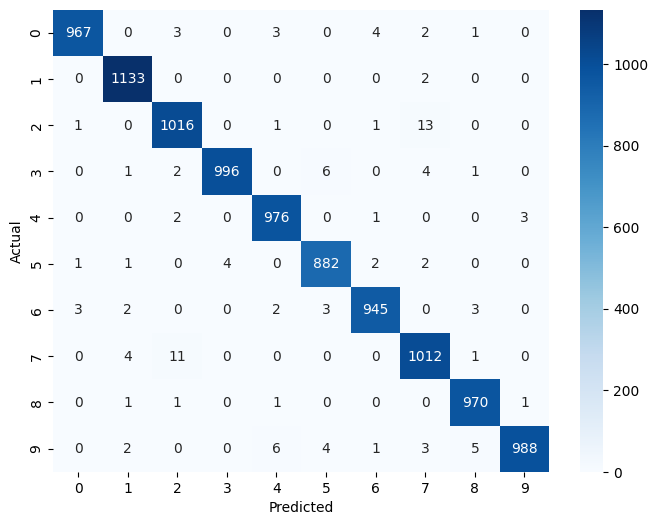

In [7]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Sample Predictions

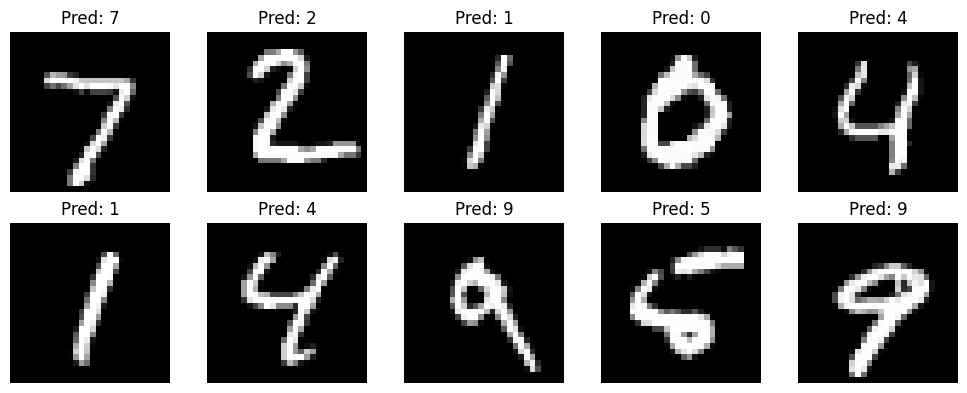

In [8]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**Save Model**


In [10]:
model.save("mnist_cnn.keras")

